In [160]:
# 2019202033 - Mugilan E.S.

In [161]:
# LAB 5 - BiVariate Analysis

In [162]:
datasets_folder = "../../datasets"

In [163]:
import sklearn
import pandas as pd
import seaborn as sb

In [164]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [217]:
# SUMMARIZING THE DATASET

In [166]:
df = pd.read_csv(f'{datasets_folder}/hotel_bookings.csv')

In [167]:
df.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


In [168]:
df.shape

(119390, 32)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [170]:
df.groupby('hotel').size()

hotel
City Hotel      79330
Resort Hotel    40060
dtype: int64

In [171]:
cleaned_data_set = df.drop(columns=['lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'total_of_special_requests'], axis='1')
cleaned_data_set.head()

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_day_of_month,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,required_car_parking_spaces,reservation_status,reservation_status_date
0,Resort Hotel,0,2015,July,1,0,C,C,No Deposit,0,Check-Out,2015-07-01
1,Resort Hotel,0,2015,July,1,0,C,C,No Deposit,0,Check-Out,2015-07-01
2,Resort Hotel,0,2015,July,1,0,A,C,No Deposit,0,Check-Out,2015-07-02
3,Resort Hotel,0,2015,July,1,0,A,A,No Deposit,0,Check-Out,2015-07-02
4,Resort Hotel,0,2015,July,1,0,A,A,No Deposit,0,Check-Out,2015-07-03


In [172]:
cleaned_data_set.describe()

,is_canceled,arrival_date_year,arrival_date_day_of_month,is_repeated_guest,required_car_parking_spaces
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,2016.156554,15.798241,0.031912,0.062518
std,0.482918,0.707476,8.780829,0.175767,0.245291
min,0.000000,2015.000000,1.000000,0.000000,0.000000
25%,0.000000,2016.000000,8.000000,0.000000,0.000000
50%,0.000000,2016.000000,16.000000,0.000000,0.000000
75%,1.000000,2017.000000,23.000000,0.000000,0.000000
max,1.000000,2017.000000,31.000000,1.000000,8.000000


In [173]:
cleaned_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   hotel                        119390 non-null  object
 1   is_canceled                  119390 non-null  int64 
 2   arrival_date_year            119390 non-null  int64 
 3   arrival_date_month           119390 non-null  object
 4   arrival_date_day_of_month    119390 non-null  int64 
 5   is_repeated_guest            119390 non-null  int64 
 6   reserved_room_type           119390 non-null  object
 7   assigned_room_type           119390 non-null  object
 8   deposit_type                 119390 non-null  object
 9   required_car_parking_spaces  119390 non-null  int64 
 10  reservation_status           119390 non-null  object
 11  reservation_status_date      119390 non-null  object
dtypes: int64(5), object(7)
memory usage: 10.9+ MB


In [174]:
# VISUALIZING DATA

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

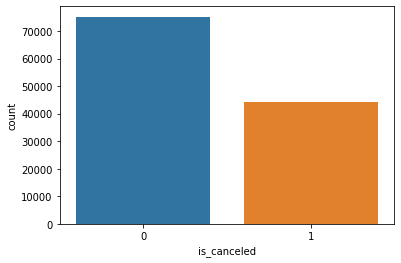

In [175]:
sb.countplot(x='is_canceled', data=cleaned_data_set)

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

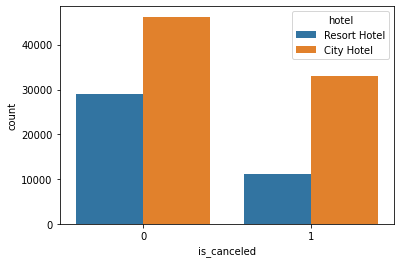

In [176]:
sb.countplot(x='is_canceled', hue='hotel', data=cleaned_data_set)

<AxesSubplot:>

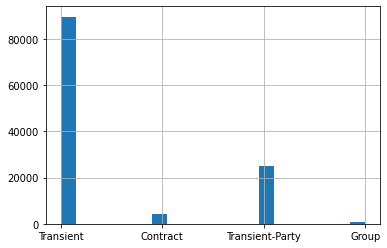

In [177]:
df['customer_type'].hist(bins = 20)

In [178]:
customer_category = []
for i in range (0, len(df['customer_type'])):
    if df['customer_type'][i] == 'Transient':
        customer_category.append('A');
    elif df['customer_type'][i] == 'Contract':
        customer_category.append('B');
    elif df['customer_type'][i] == 'Transient-Party':
        customer_category.append('C');
    else:
        customer_category.append('D');

customer_data_frame = pd.DataFrame(data=customer_category, columns=['CustomerCategory'])
augmented_data_set = pd.concat([cleaned_data_set, customer_data_frame], axis=1)
augmented_data_set.tail()

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_day_of_month,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,required_car_parking_spaces,reservation_status,reservation_status_date,CustomerCategory
119385,City Hotel,0,2017,August,30,0,A,A,No Deposit,0,Check-Out,2017-09-06,A
119386,City Hotel,0,2017,August,31,0,E,E,No Deposit,0,Check-Out,2017-09-07,A
119387,City Hotel,0,2017,August,31,0,D,D,No Deposit,0,Check-Out,2017-09-07,A
119388,City Hotel,0,2017,August,31,0,A,A,No Deposit,0,Check-Out,2017-09-07,A
119389,City Hotel,0,2017,August,29,0,A,A,No Deposit,0,Check-Out,2017-09-07,A


<AxesSubplot:xlabel='is_canceled', ylabel='count'>

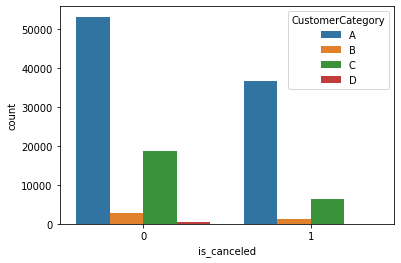

In [179]:
sb.countplot(x='is_canceled', hue='CustomerCategory', data=augmented_data_set)

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

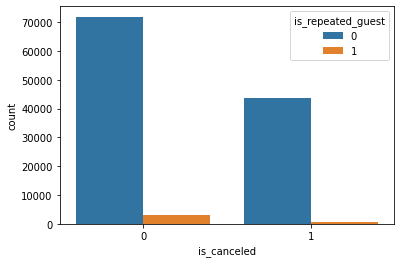

In [180]:
sb.countplot(x='is_canceled', hue='is_repeated_guest', data=augmented_data_set)

In [181]:
augmented_data_set_2 = augmented_data_set[augmented_data_set['deposit_type'] != 'No Deposit']
augmented_data_set_2.value_counts('deposit_type')

deposit_type
Non Refund    14587
Refundable      162
dtype: int64

In [182]:
augmented_data_set_3 = augmented_data_set_2[augmented_data_set_2['reservation_status'] != 'Canceled']
augmented_data_set_3.value_counts('reservation_status')

reservation_status
Check-Out    219
No-Show       35
dtype: int64

In [183]:
binary_hotels = pd.get_dummies(augmented_data_set_3['hotel'], drop_first=True)
binary_hotels.head()

,Resort Hotel
1559,1
3588,1
3589,1
3590,1
3591,1


In [184]:
binary_deposits = pd.get_dummies(augmented_data_set_3['deposit_type'], drop_first=True)
binary_deposits.head()

,Refundable
1559,1
3588,0
3589,0
3590,0
3591,0


In [185]:
binary_status = pd.get_dummies(augmented_data_set_3['reservation_status'], drop_first=True)
binary_status.head()

,No-Show
1559,0
3588,1
3589,1
3590,1
3591,1


In [188]:
final_data_set = pd.concat([augmented_data_set_3, binary_hotels, binary_deposits, binary_status], axis=1)
final_data_set_1 = final_data_set.drop(columns=['hotel', 'deposit_type', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'required_car_parking_spaces', 'reserved_room_type', 'assigned_room_type', 'reservation_status', 'reservation_status_date', 'CustomerCategory'], axis=1)
final_data_set_1.head()

,is_canceled,is_repeated_guest,Resort Hotel,Refundable,No-Show
1559,0,0,1,1,0
3588,1,0,1,0,1
3589,1,0,1,0,1
3590,1,0,1,0,1
3591,1,0,1,0,1


In [189]:
final_data_set_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 1559 to 110609
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   is_canceled        254 non-null    int64
 1   is_repeated_guest  254 non-null    int64
 2   Resort Hotel       254 non-null    uint8
 3   Refundable         254 non-null    uint8
 4   No-Show            254 non-null    uint8
dtypes: int64(2), uint8(3)
memory usage: 6.7 KB


In [190]:
# MODELING DATA

In [191]:
Y = final_data_set_1['is_canceled']
X = final_data_set_1.drop (columns=['is_canceled'], axis=1)

In [192]:
X.head()

,is_repeated_guest,Resort Hotel,Refundable,No-Show
1559,0,1,1,0
3588,0,1,0,1
3589,0,1,0,1
3590,0,1,0,1
3591,0,1,0,1


In [193]:
Y.head()

1559    0
3588    1
3589    1
3590    1
3591    1
Name: is_canceled, dtype: int64

In [194]:
test_set_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_set_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [195]:
predictions = model.predict(X_test)

In [196]:
report = classification_report(Y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00         5

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



In [197]:
print(confusion_matrix(Y_test, predictions))

[[46  0]
 [ 0  5]]


In [198]:
accuracy_score(Y_test, predictions)

1.0

In [208]:
Y = df.iloc[:, 1]
X = df.iloc[:, 1:2]

In [209]:
print (X.head())

   is_canceled
0            0
1            0
2            0
3            0
4            0


In [210]:
print (Y.head())

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64


In [211]:
test_set_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_set_size, random_state=seed)

In [212]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [213]:
classifier = LogisticRegression(random_state=seed, solver='liblinear')
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [214]:
predictions = classifier.predict(X_test)

In [215]:
report = classification_report(Y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14934
           1       1.00      1.00      1.00      8944

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [216]:
accuracy_score(Y_test, predictions)

1.0